# Multi-Class Classification

This lesson picks up where <a href="https://github.com/4igeek/TensorFlow/blob/main/Classification/NonLinearBinaryClassification.ipynb">Non-Linear Binary Classification</a> takes off. In this notebook we're going to look at solving another classification problem only this time we're going to have more than two labels (classes). The steps for solving a binary class problem are the same as the steps for solving a multi-class problem.

In this example we are going to classify images of clothing i.e. t-shirts, shoes etc. For this we're going to use the <a href="https://www.tensorflow.org/datasets/catalog/fashion_mnist" target="blank">TensorFlow fashion MNIST</a> dataset. 

TensorFlow has a variety of datasets that we can use to practice solving certain problems. Most of the time when we're working on a problem we can use one of these "practice" datasets to come up with a model before we pass it our actual data.

## Recap of the steps for building a model
<ol>
  <li>
    Prepare the data
    <ul>
      <li>Turn all data into numbers</li>
      <li>Make sure all tensors are the correct shape</li>
      <li>Scale features (normalise or standardise)</li>
    </ul>
  </li>
  <li>Build a model</li>
  <li>Fit the model to the data (and make predictions)</li>
  <li>Evaluate the model</li>
  <li>Improve through experimentation</li>
  <li>Save the model</li>
</ol>

## Mnist Fashion Labels
| Label | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **Description** | T-shirt | Trousers | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle Boot |

## 1) Prepare the data


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data from the mnist datasets are already 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# We can check to see what the first item is in our training dataset by checking the label (in this case 9 i.e. an Ankle Boot).
print(f"Training Label:\n{train_labels[0]}")

Training Label:
9


## Inspecting the data

We need to know what form our data is in before we can begin to build our model, that is because we need to know how many inputs our network will have.

In [3]:
## Checking the shape of a data sample
train_data[0].shape, train_labels[0].shape

((28, 28), ())

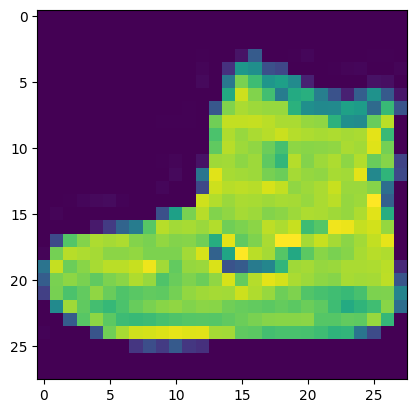

In [4]:
# Plotting a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [5]:
# Check our label is correct for the same index
train_labels[0]

9

The 9 above denotes that the item we printed was an ankle boot. A good idea would be to make this output better understandable by humans (so we don't need to keep referring to the table to see what our prediction is). 

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[train_labels[0]]

'Ankle boot'

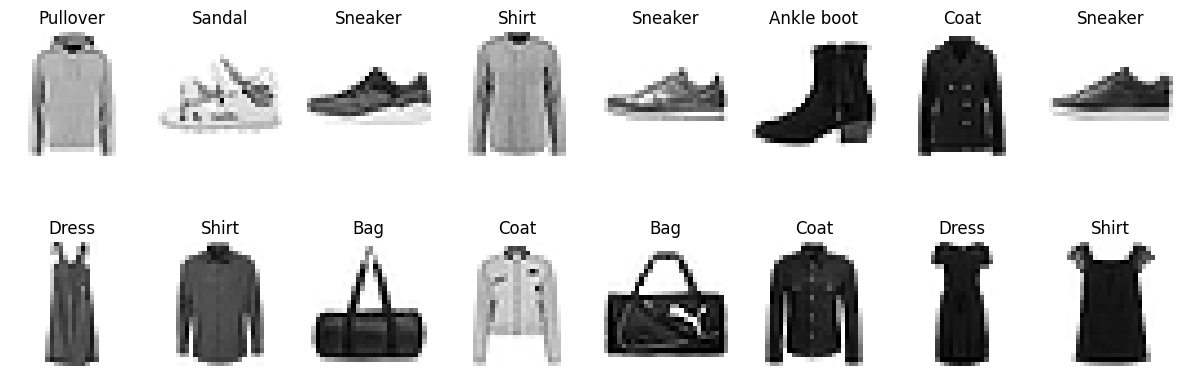

In [7]:
# Generate random number to represent an index in the dataset
import random

plt.figure(figsize=(15,5))

for i in range(16):
    ax = plt.subplot(2,8, i+1)
    random_number = random.randint(0, 60000)
    plt.imshow(train_data[random_number], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_number]])
    plt.axis(False)

## What do we know about our data?

When looking at the images above what can we say about the data? Would we be able to find solutions using nothing but straight lines or would we need some curves in there? We need to know because straight or curved lines define whether we're going to build a linear or a non-linear model. 

**It looks like we're going to include some non-linearity into our model.**

Usually at this point we would need to convert our data into tensors but this has already been done for us by TensorFlow.

## 2) Build our milti-class classification model

<table style="width:100%">
    <thead>
        <tr>
            <th>Hyperparameter</th>
            <th>Binary Classification</th>
            <th>Multiclass Classification</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Input layer shape</td>
            <td colspan=2>Same as the number of features in the data</td>
        </tr>
        <tr>
            <td>Hidden layer(s)</td>
            <td colspan=2>Problem specific, minimum=1, maximum=infinity</td>
        </tr>
        <tr>
            <td>Neurons/hidden layer</td>
            <td colspan=2>Problem specific, generally 10 to 100</td>
        </tr>
        <tr>
            <td>Output layer shape</td>
            <td>One class or the other</td>
            <td>One per class</td>
        </tr>
        <tr>
            <td>Hidden activation</td>
            <td colspan=2>Usually reLU</td>
        </tr>
        <tr>
            <td>Output activation</td>
            <td>Sigmoid</td>
            <td>Softmax</td>
        </tr>
        <tr>
            <td>Loss function</td>
            <td>Binary Crossentropy</td>
            <td>Categorical Crossentropy</td>
        </tr>
        <tr>
            <td>Optimiser</td>
            <td colspan=2>SGD or Adam</td>
        </tr>
    </tbody>
</table>

We can see from the table above what "things" need to be changed when we switch from binary to multi-classification problems.

* One thing that is different is the input shape. In <a href="https://github.com/4igeek/TensorFlow/blob/main/Classification/NonLinearBinaryClassification.ipynb">Non-Linear Binary Classification</a> we only had two inputs but in this problem we've got a 28x28 grid of RGB values. This means that instead of only two inputs we actually have 784 inputs. 

* Another thing that will change is the output layer shape. In Non-Linear Binary Classification we had one output which was either true (1) or false (0). In this problem we have 10 different classes and as such we need to have 10 output neurons.

* We also need to change the binary crossentropy loss function to be a categorical crossentropy loss function. <i>**Note:** When using categorical crossentropy, if the labels are not one-hot encoded (as they are not in this dataset) then we need to use the sparce categorical crossentropy loss function or we can one-hot encode our labels - more on that can be read using the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy" target="_blank">TensorFlow CategoricalCrossentropy documentation</a></i>.

* The last thing we need to change is the activation function (from sigmoid to softmax) for the output layer. 

## Create the model

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
model_history = model.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.1028 - loss: 3.8162 - val_accuracy: 0.1199 - val_loss: 2.2590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.1375 - loss: 2.2243 - val_accuracy: 0.1602 - val_loss: 2.1719
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.1540 - loss: 2.1806 - val_accuracy: 0.1614 - val_loss: 2.1557
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.1667 - loss: 2.1476 - val_accuracy: 0.2032 - val_loss: 2.0402
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.2130 - loss: 1.9810 - val_accuracy: 0.2556 - val_loss: 1.7815
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.2450 - loss: 1.7595 - val_accuracy: 0.2426 - val_loss: 1.7314
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.2431 - loss: 1.7309 - val_accuracy: 0.2425 - val_loss: 1.7130
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.2422 -

## Validation data

In the model above we fed our "fit" function a new parameter which was "validation_data". This adds another two metrics to our epochs output i.e. val_accuracy and val_loss. In this example we used the test set as the validation set but in practice we would further split the dataset to achieve a validation set. Seeing that the mnist fashion dataset is so large, we could create this validation set from our training data i.e. 10% of the training data could become validation data.

We need this validation data to see how well our model will perform in the real world before we give the model our test data. We want it to peform well on this validation data.

So far (in terms of getting the data ready) this is what we've got:
<ol>
  <li>
    Prepare the data
    <ul>
      <li>Turn all data into numbers <span style="color: green; font-weight: bold;">✓</span></li>
      <li>Make sure all tensors are the correct shape <span style="color: green; font-weight: bold;">✓</span></li>
      <li>Scale features (normalise or standardise) ❌</li>
    </ul>
  </li>
</ol>
Neural networks prefer normalised data so if we want to improve our model we should probably start there.

In [9]:
# Check the min and max values in the dataset
train_data.min(), train_data.max()

(0, 255)

The minimum value is 0 and the max value is 255. What we want to do now is scale these numbers down (keeping the correct scale) to be between 0 and 1 (where 0 represents 0 and 1 represents 255). We can do this by dividing each element in the dataset by the max value i.e. 255.

In [10]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Now check the min and max values of the scaled data.
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [17]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_norm = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
model_norm_history = model_norm.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.3783 - loss: 1.7498 - val_accuracy: 0.5848 - val_loss: 1.0919
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.6260 - loss: 0.9836 - val_accuracy: 0.6867 - val_loss: 0.8243
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7021 - loss: 0.7694 - val_accuracy: 0.7208 - val_loss: 0.7162
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.7342 - loss: 0.6749 - val_accuracy: 0.7360 - val_loss: 0.6673
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7460 - loss: 0.6310 - val_accuracy: 0.7466 - val_loss: 0.6363
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.7587 - loss: 0.6045 - val_accuracy: 0.7736 - val_loss: 0.6229
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.7975 - loss: 0.5638 - val_accuracy: 0.7904 - val_loss: 0.5829
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8081 -

## Plotting the history from the two models

We now have two models that we have trained. One with normal data and one with normalised data. We're going to plot the history of both to see the difference.

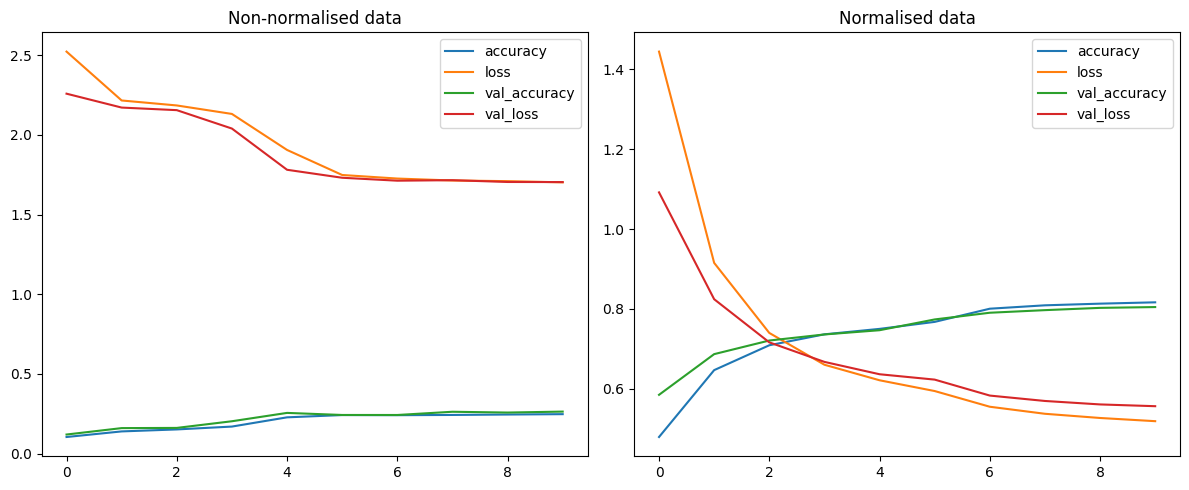

In [21]:
import pandas as pd
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for non-normalized data
pd.DataFrame(model_history.history).plot(ax=axs[0], title="Non-normalised data")

# Plot for normalized data
pd.DataFrame(model_norm_history.history).plot(ax=axs[1], title="Normalised data")

plt.tight_layout()
plt.show()


<i>**Note:** We can see from the two plots above that the normalised data works better. We could probably run the model for more epochs for the results to eventually tend towards the same result but by normalising our data we can save time in training.</i>

### Now we're here:
<ol>
  <li>
    Prepare the data
    <ul>
      <li>Turn all data into numbers <span style="color: green; font-weight: bold;">✓</span></li>
      <li>Make sure all tensors are the correct shape <span style="color: green; font-weight: bold;">✓</span></li>
      <li>Scale features (normalise or standardise) <span style="color: green; font-weight: bold;">✓</span></li>
    </ul>
  </li>
</ol>

## Finding the ideal learning rate

We've already spoken about finding the ideal learning rate for a neural network in the reference doc: <a href="https://github.com/4igeek/TensorFlow/blob/main/Reference/LearningRateOptimisation.ipynb" target="blank">Learning Rate Optimiser</a> but now we're going to look for it again to solve this problem.

In [38]:
# Firstly we need to declare our callback function
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# Set random seed
tf.random.set_seed(42)

# Create the model
model_cb = tf.keras.Sequential([
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_cb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
model_cb_history = model_cb.fit(train_data_norm,
                            train_labels,
                            epochs=40, # Change the epochs from 10 to 40
                            validation_data=(test_data_norm, test_labels),
                            callbacks=[lr_scheduler],
                            verbose=0)

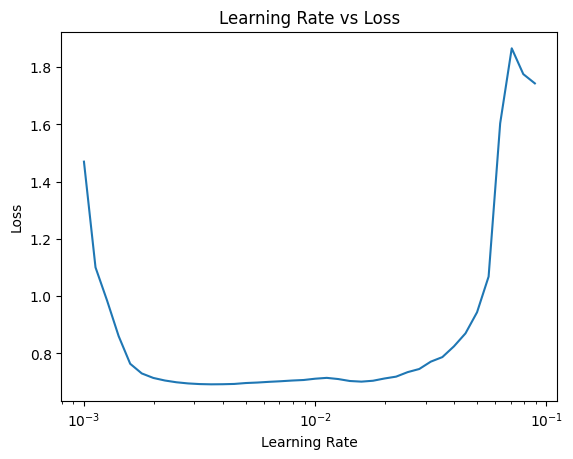

In [39]:
learning_rates = 1e-3 * (10 ** (tf.range(40)/20))
plt.plot(figsize=(10,7))
plt.semilogx(learning_rates, model_cb_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

We learned in the <a href="https://github.com/4igeek/TensorFlow/blob/main/Reference/LearningRateOptimisation.ipynb" target="blank">Learning Rate Optimiser</a> lesson that the ideal learning rate is where the loss is decreasing sharply. Another way would be to find the lowest point on the graph and then go back a little bit.

By the looks of the graph above, we can see that the ideal learning rate would be 0.001 (which is the default value for Adam which is what we're using in this model). 

### This is where we're at so far
<ol>
  <li>Prepare the data <span style="color: green; font-weight: bold;">✓</span></li>
  <li>Build a model <span style="color: green; font-weight: bold;">✓</span></li>
  <li>Fit the model to the data <span style="color: green; font-weight: bold;">✓</span> (and make predictions) ❌</li>
  <li>Evaluate the model ❌</li>
  <li>Improve through experimentation <span style="color: green; font-weight: bold;">✓</span></li>
  <li>Save the model</li>
</ol>

## Evaluating our multi-class classification model
To ecaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics
* Assess some predictions

## Creating a confusion matrix

We're going to borrow some code that we wrote in the <a href="https://github.com/4igeek/TensorFlow/blob/main/Reference/ConfusionMatrix.ipynb">Confusion Matrix</a> notebook to create a confusion matrix for this mnist fashion problem.